# Sıtma Verilerinde CNN ile Görüntü Sınıflandırması

Sıtma içeren veya içermeyen Görüntü Hücrelerini tespit edip konuşlandırarak insanları kurtarın!



<a href="https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria">Dataya Buradan erişebilirsiniz</a>

### Eski Usül Çözüm

In [41]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import cv2

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

In [42]:
img_path="cell_images/"
labels=['Parasitized', 'Uninfected']

In [43]:
#Dosyadan Resim okuma
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):          #Klasörün içindeki alt klasörleri söyler
        img_list.append(img_path+label+'/'+img_file)     # apppend dizinin sonuna eklme yapıyor
        label_list.append(label)
        

In [44]:
df=pd.DataFrame({"img":img_list,"label":label_list})

In [45]:
df.head()

,img,label
0,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized
1,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized
2,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized
3,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized
4,cell_images/Parasitized/C100P61ThinF_IMG_20150...,Parasitized


In [46]:
d={"Parasitized":1,"Uninfected":0}

In [47]:
df["encode_label"]=df["label"].map(d)

In [48]:
df.tail()

,img,label,encode_label
27553,cell_images/Uninfected/C99P60ThinF_IMG_2015091...,Uninfected,0
27554,cell_images/Uninfected/C99P60ThinF_IMG_2015091...,Uninfected,0
27555,cell_images/Uninfected/C99P60ThinF_IMG_2015091...,Uninfected,0
27556,cell_images/Uninfected/C99P60ThinF_IMG_2015091...,Uninfected,0
27557,cell_images/Uninfected/C99P60ThinF_IMG_2015091...,Uninfected,0


In [49]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(28,28))  #Boyutunu 28*28 px yaptık
    img=img/255.0  #Normalize Ettik
    x.append(img)

In [50]:
x=np.array(x)

In [51]:
y=df["encode_label"]

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
model1=Sequential()
model1.add(Input(shape=(28,28,3)))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Dense(2, activation='softmax')) # 10 fakli cevap classification 0-9 a kadar olan rakamlar
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

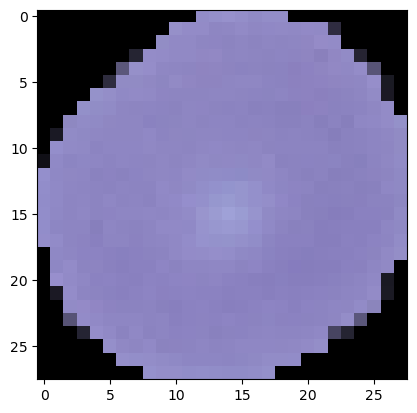

In [54]:
plt.imshow(x_train[985])

In [55]:
history=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,verbose=1)

Epoch 1/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6478 - loss: 0.6165 - val_accuracy: 0.8893 - val_loss: 0.2588
Epoch 2/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9288 - loss: 0.2061 - val_accuracy: 0.9410 - val_loss: 0.1664
Epoch 3/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9457 - loss: 0.1618 - val_accuracy: 0.9403 - val_loss: 0.1691
Epoch 4/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9456 - loss: 0.1560 - val_accuracy: 0.9416 - val_loss: 0.1680
Epoch 5/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9522 - loss: 0.1411 - val_accuracy: 0.9478 - val_loss: 0.1629
Epoch 6/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9550 - loss: 0.1327 - val_accuracy: 0.9474 - val_loss: 0.1582
Epoch 7/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9575 - loss: 0.1241 - val_accuracy: 0.9438 - val_loss: 0.1722
Epoch 8/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9534 - loss: 0.1297 - val_accuracy: 0.

In [56]:
model1.save("sitma_kontrol.h5")

### Yeni nesil Çözüm (Keras ile)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Tek satırda resimlerin tamamını okumaya yarıyor

In [15]:
data_dir="cell_images"
img_width,img_height=64,64

train_datagen=ImageDataGenerator( rescale=1/255, validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="binary", subset="training")

test_datagen=ImageDataGenerator( rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode="binary", subset="validation")

base_model=VGG16(weights="imagenet", input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation="relu")) # Dense nöronları birbirine bağlar
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 124s 179ms/step - accuracy: 0.8730 - loss: 0.3095 - val_accuracy: 0.9091 - val_loss: 0.2260
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 166s 241ms/step - accuracy: 0.9280 - loss: 0.1844 - val_accuracy: 0.9254 - val_loss: 0.1919
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 118s 171ms/step - accuracy: 0.9391 - loss: 0.1638 - val_accuracy: 0.9181 - val_loss: 0.2067
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 120s 174ms/step - accuracy: 0.9460 - loss: 0.1492 - val_accuracy: 0.9083 - val_loss: 0.2221
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 177ms/step - accuracy: 0.9405 - loss: 0.1568 - val_accuracy: 0.9276 - val_loss: 0.1889
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 177ms/step - accuracy: 0.9476 - loss: 0.1418 - val_accuracy: 0.9102 - val_loss: 0.2304
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 123s 179ms/step - accuracy: 0.9484 - loss: 0.1364 - val_accuracy: 0.9211 - val_loss